<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Spatial Databases: Representation, Creation, and Statistics

## Installation of PAMI library

In [1]:
!pip install pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 805.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.9 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=250050397b966995634a700252c7abbae7ec2ad60bde935393136b2193f7b979
  Stored in directory: /root/.cache/pip/wheels/ee/53/ac/c77344bd941889aa16ad694cb203ee587de1749e973ba9fdb8
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4754 sha256=65847e0a2d51286f02bf03469

## Download a sample database

In [1]:
!wget -nc --no-check-certificate https://github.com/UdayLab/Hands-on-Pattern-Mining/raw/main/datasets/spatiotemporal_T10I4D100K.csv

--2025-06-14 10:03:11--  https://github.com/UdayLab/Hands-on-Pattern-Mining/raw/main/datasets/spatiotemporal_T10I4D100K.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UdayLab/Hands-on-Pattern-Mining/main/datasets/spatiotemporal_T10I4D100K.csv [following]
--2025-06-14 10:03:11--  https://raw.githubusercontent.com/UdayLab/Hands-on-Pattern-Mining/main/datasets/spatiotemporal_T10I4D100K.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8530208 (8.1M) [text/plain]
Saving to: ‘spatiotemporal_T10I4D100K.csv’

spatiotemporal_T10I 100%[===================>]   8.13M  --.-KB/s    in 0.03s   

2025-0

## Generating Synthetic Geo-referenced Transactional Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import GeoReferentialTransactionalDatabase as db
  
obj = db.GeoReferentialTransactionalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximalXaxisCoordinate,
        y2=maximalYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [4]:
from PAMI.extras.syntheticDataGenerator import GeoReferentialTransactionalDatabase as db

obj = db.GeoReferentialTransactionalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferencedTransactionalDatabase.csv')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

100%|██████████| 1000/1000 [00:00<00:00, 5895.65it/s]

Runtime: 0.21576833724975586
Memory (RSS): 176660480
Memory (USS): 155758592


In [5]:
!head geoReferencedTransactionalDatabase.csv

(68, 20)	(29, 83)	(4, 20)	(41, 88)	(48, 78)	(83, 87)	(0, 96)	(50, 15)	(62, 50)
(9, 3)	(31, 87)	(30, 74)	(22, 64)	(31, 74)	(80, 84)	(36, 37)	(6, 0)	(86, 73)
(50, 15)	(45, 60)	(74, 42)	(75, 15)	(95, 60)	(19, 69)	(35, 69)	(0, 43)	(75, 58)	(50, 27)	(93, 57)	(57, 93)	(38, 82)	(7, 31)
(35, 34)	(44, 84)	(38, 82)	(42, 49)	(43, 68)	(13, 67)	(30, 14)	(97, 9)	(8, 42)	(68, 75)	(17, 50)	(73, 57)	(9, 84)
(90, 60)	(18, 45)	(30, 76)	(2, 38)	(13, 99)	(8, 16)	(14, 7)	(62, 58)	(39, 34)
(41, 70)	(20, 14)	(94, 14)	(16, 15)	(91, 50)	(63, 66)	(50, 27)	(11, 0)	(10, 54)
(12, 4)	(58, 92)	(26, 57)	(35, 76)	(81, 25)	(94, 40)	(80, 84)	(65, 27)	(56, 7)	(4, 66)
(2, 8)	(57, 93)	(79, 6)	(37, 18)	(60, 76)	(39, 10)	(35, 55)	(63, 16)	(66, 13)	(43, 51)	(71, 37)	(94, 14)
(28, 11)	(95, 60)	(90, 86)	(72, 63)	(20, 14)	(92, 26)	(50, 80)	(82, 34)	(31, 79)	(2, 70)	(60, 55)	(91, 84)	(11, 79)	(86, 25)
(67, 42)	(33, 86)	(55, 8)	(0, 96)	(54, 23)	(1, 30)	(32, 37)	(39, 11)	(50, 49)


## Generating Synthetic Geo-referenced Temporal Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import GeoReferentialTemporalDatabase as db
  
obj = db.GeoReferentialTemporalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        occurrenceProbabilityOfSameTimestamp=probabilityWithWhichTheNextTransactionAppearsAtTheSameTimeStamp,
        occurrenceProbabilityToSkipSubsequentTimestamp=probabilityWithWhichTheNextTransactionSkipsTheNextTimeStamp,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximumXaxisCoordinate,
        y2=maximumYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [7]:
from PAMI.extras.syntheticDataGenerator \
    import GeoReferentialTemporalDatabase as db

obj = db.GeoReferentialTemporalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        occurrenceProbabilityOfSameTimestamp=0,
        occurrenceProbabilityToSkipSubsequentTimestamp=0,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferentialTemporalDatabase.csv')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

100%|██████████| 1000/1000 [00:00<00:00, 6805.76it/s]

Runtime: 0.22162246704101562
Memory (RSS): 177197056
Memory (USS): 156307456


In [8]:
!head geoReferentialTemporalDatabase.csv

1	(8, 98)	(62, 44)	(84, 51)	(3, 51)	(55, 83)	(89, 33)	(6, 88)	(41, 19)	(47, 41)	(58, 37)
2	(84, 86)	(75, 5)	(29, 62)	(16, 70)	(61, 44)	(55, 32)	(13, 71)	(6, 35)	(52, 60)
3	(63, 10)	(36, 20)	(8, 89)	(61, 39)	(3, 39)	(84, 6)	(47, 21)	(90, 48)	(30, 72)	(7, 23)	(66, 69)	(12, 29)
4	(91, 85)	(53, 26)	(52, 60)	(95, 7)	(33, 20)	(9, 85)	(32, 94)	(49, 94)	(6, 90)
5	(1, 0)	(68, 20)	(33, 20)	(80, 9)	(66, 66)	(21, 40)	(98, 15)	(87, 0)	(23, 31)	(29, 1)	(70, 71)
6	(78, 25)	(12, 76)	(63, 40)	(89, 93)	(28, 30)	(15, 68)	(26, 74)	(54, 60)	(3, 74)
7	(53, 61)	(56, 7)	(0, 57)	(41, 62)	(89, 78)	(34, 42)	(36, 28)	(77, 46)	(73, 1)
8	(41, 9)	(74, 75)	(57, 18)	(6, 77)	(14, 2)	(17, 84)	(52, 26)	(22, 9)	(87, 42)
9	(6, 88)	(36, 82)	(81, 71)	(78, 35)	(36, 33)	(9, 70)	(18, 71)	(82, 29)	(60, 93)
10	(87, 0)	(44, 98)	(97, 36)	(90, 59)	(64, 63)	(19, 72)	(16, 52)	(35, 8)	(99, 6)	(19, 24)	(22, 9)	(53, 7)	(51, 99)	(83, 31)


## Converting a Georeferenced Dataframe into a Georeferenced Transactional Database

### Generic



```python

from PAMI.extras.convert import DF2DB as alg

obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='outputFileName.txt', condition='>=|>|<=|<|==|!=', thresholdValue=thresholdValue)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 3

In [9]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np
#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
columns=['POINT(0 0)', 'POINT(0 1)',
'POINT(0 2)', 'POINT(0 3)']
)
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(
oFile='georeferencedTransactionalDatabase.txt',
condition='>=', thresholdValue=36
)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.008749246597290039
Memory (RSS): 177360896
Memory (USS): 156696576


## Converting a Georeferenced Dataframe into a Georeferenced Temporal Database

### Generic



```python
from PAMI.extras.convert import DF2DB as alg


#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(oFile='outputFileName', condition='>=|>|<=|<|==|!=', thresholdValue=36)

print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 4

In [10]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 5 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(5, 4))
dataFrame = pd.DataFrame(data,
             columns=['POINT(0 0)', 'POINT(0 1)',
             'POINT(0 2)', 'POINT(0 3)']
            )
# Adding a timestamp column with specific values
timestamps = [1, 3, 3, 5, 8]
dataFrame.insert(0, 'timestamp', timestamps)

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(
        oFile='georeferencedTemporalDatabase.txt',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.00576472282409668
Memory (RSS): 177360896
Memory (USS): 156770304


## Getting Statistical Details for a Geo-referenced Transactional Database

### Generic


```
from PAMI.extras.dbStats import georeferencedTransactionalDatabase as stat

obj = stat.georeferencedTransactionalDatabase(iFile="transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()
obj.plotLocations()
```



### Example

Database size (total no of transactions) : 3
Number of items : 4
Minimum Transaction Size : 3
Average Transaction Size : 3.3333333333333335
Maximum Transaction Size : 4
Standard Deviation Transaction Size : 0.4714045207910317
Variance in Transaction Sizes : 0.3333333333333333
Sparsity : 0.16666666666666666


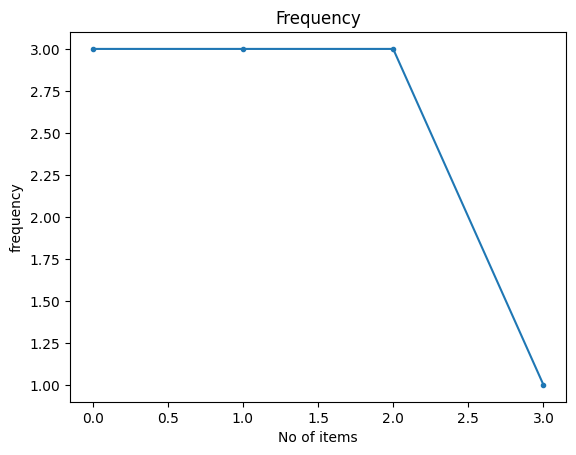

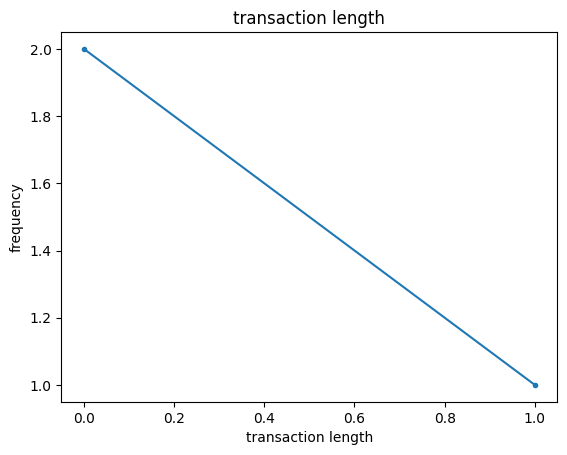

In [14]:
from PAMI.extras.dbStats import GeoreferencedTransactionalDatabase as stat

obj = stat.GeoreferencedTransactionalDatabase(iFile="georeferencedTransactionalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()

## Getting Statistical Details for a Geo-referenced Timeseries Database

Database size : 5
Number of items : 4
Minimum Transaction Size : 2
Average Transaction Size : 2.6
Maximum Transaction Size : 3
Minimum Inter Arrival Period : 1
Average Inter Arrival Period : 1.0
Maximum Inter Arrival Period : 1
Minimum periodicity : 1
Average periodicity : 2.25
Maximum periodicicty : 4
Standard Deviation Transaction Size : 0.4898979485566356
Variance : 0.3
Sparsity : 0.35


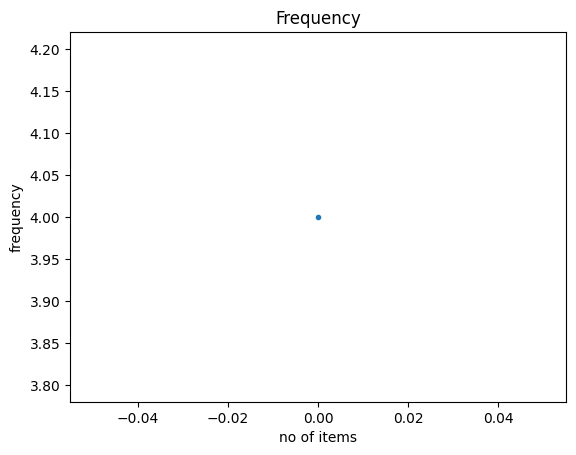

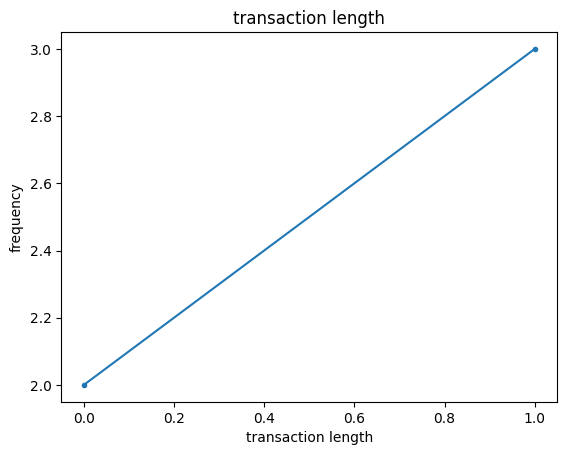

In [15]:
from PAMI.extras.dbStats import  GeoreferencedTemporalDatabase as stat

obj = stat.GeoreferencedTemporalDatabase(iFile="georeferencedTemporalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()